<a href="https://colab.research.google.com/github/MfundoMhlanga/classification-predict-streamlit-template/blob/master/Classification_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MfundoMhlanga/classification-predict-streamlit-template/master/train.csv')
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df = df[:10546]

(array([ 865.,    0.,    0., 1587.,    0.,    0., 5636.,    0.,    0.,
        2458.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <BarContainer object of 10 artists>)

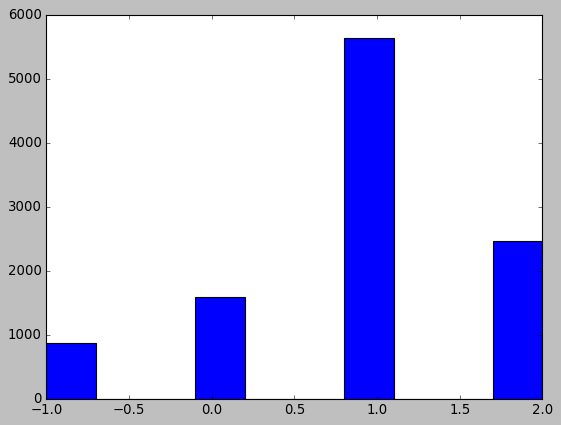

In [ ]:
plt.hist(df['sentiment'])

In [ ]:
y=df.sentiment
X_train, X_test, y_train, y_test = train_test_split(df['message'], y, test_size=0.2, random_state=42)

# Pre-Processing using vectors

Count Vectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

TF-IDF 

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [ ]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_test = tfidf_vectorizer.transform(X_test.values)

Harshing Vectorizer

In [ ]:
hvectorizer = HashingVectorizer(n_features = 2, stop_words = 'english')
hvectorizer_train = hvectorizer.fit_transform(X_train.values)
hvectorizer_test = hvectorizer.transform(X_test.values)

## Models

NB Classifier

In [ ]:
nb_classifier = MultinomialNB()

In [ ]:
#Train and fit the CountVectorizer

nb_classifier.fit(count_train, y_train)
pred_cv_nbc = nb_classifier.predict(count_test)

In [ ]:
#Train and fit the tfidf-Vectorizer

nb_classifier.fit(tfidf_train, y_train)
pred_tfidf_nbc = nb_classifier.predict(tfidf_test)

Support Vector Classification

In [ ]:
svc = SVC(kernel='linear', C=10.0, random_state=1)

In [ ]:
#Train and fit the CountVectorizer

svc.fit(count_train, y_train)
pred_cv_svc = svc.predict(count_test)

In [ ]:
#Train and fit the tfidf-Vectorizer

svc.fit(tfidf_train, y_train)
pred_tfidf_svc = svc.predict(tfidf_test)

KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
#Train and fit the CountVectorizer

knn.fit(count_train, y_train)
pred_cv_knn = knn.predict(count_test)

In [ ]:
#Train and fit the tfidf-Vectorizer

knn.fit(tfidf_train, y_train)
pred_tfidf_knn = knn.predict(tfidf_test)

## Model Performance

In [ ]:
score_tfidf_nbc = metrics.accuracy_score(y_test ,pred_tfidf_nbc)
score_tfidf_svc = metrics.accuracy_score(y_test ,pred_tfidf_svc)
score_tfidf_knn = metrics.accuracy_score(y_test ,pred_tfidf_knn)


In [ ]:
score_tfidf_df = pd.DataFrame({'N-B Classifer': [score_cv_nbc, score_tfidf_nbc],
                              'SV Classifer': [score_cv_svc, score_tfidf_svc],
                              'KNN Classifer': [score_cv_knn, score_tfidf_knn]},index = ['CountVectorizer','tfidf-Vectorizer'])

In [ ]:
score_tfidf_df

,N-B Classifer,SV Classifer,KNN Classifer
CountVectorizer,0.685782,0.698578,0.425118
tfidf-Vectorizer,0.616588,0.702370,0.645498


In [ ]:
score_cv_nbc = metrics.accuracy_score(y_test ,pred_cv_nbc)
score_cv_svc = metrics.accuracy_score(y_test ,pred_cv_svc)
score_cv_knn = metrics.accuracy_score(y_test ,pred_cv_knn)

In [ ]:
f1_score_cv_nbc = f1_score(y_test, pred_cv_nbc, average='macro')
f1_score_cv_svc = f1_score(y_test, pred_cv_svc, average='macro')
f1_score_cv_knn = f1_score(y_test, pred_cv_knn, average='macro')

f1_score_tfidf_nbc = f1_score(y_test, pred_tfidf_nbc, average='macro')
f1_score_tfidf_svc = f1_score(y_test, pred_tfidf_svc, average='macro')
f1_score_tfidf_knn = f1_score(y_test, pred_tfidf_knn, average='macro')

In [ ]:
f1_score_df = pd.DataFrame({'N-B Classifer': [f1_score_cv_nbc, f1_score_tfidf_nbc],
                              'SV Classifer': [f1_score_cv_svc, f1_score_tfidf_svc],
                              'KNN Classifer': [f1_score_cv_knn, f1_score_tfidf_knn]},index = ['CountVectorizer','tfidf-Vectorizer'])
f1_score_df

,N-B Classifer,SV Classifer,KNN Classifer
CountVectorizer,0.499704,0.629632,0.341883
tfidf-Vectorizer,0.333225,0.626084,0.558299


From the table above we can see that the SVC classifier that uses the CountVectorizer, is the obvious choice with the highest f1 score.........

In [ ]:

conf_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = pred_cv_svc)
conf_matrix

array([[ 80,  26,  49,   5],
       [ 25, 165, 107,  19],
       [ 32, 131, 877,  97],
       [  7,  24, 114, 352]], dtype=int64)

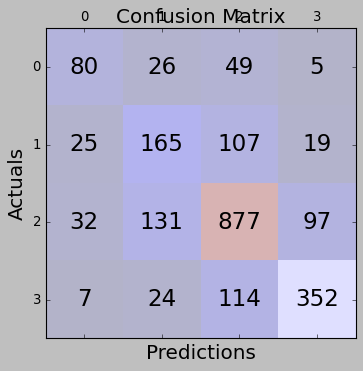

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.seismic, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<ipython-input-144-d2893963cb79>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()
<ipython-input-144-d2893963cb79>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor('yellow')
No handles with labels found to put in legend.


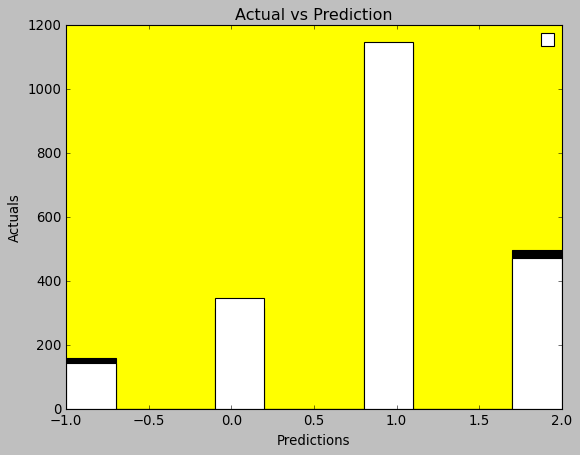

In [ ]:
#Histogram showing how the predicted seniments corresponds to the true values, 

plt.hist(y_test, color = 'black')
plt.hist(pred_cv_svc, color = 'white')
#plot formatting

plt.axes()
plt.axes().set_facecolor('yellow')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Actual vs Prediction')
plt.legend()
plt.show()

## Submission

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/MfundoMhlanga/classification-predict-streamlit-template/master/test_with_no_labels.csv')
df_test

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


In [ ]:
tfidf_df_test = tfidf_vectorizer.fit_transform(df_test['message'].values)

In [ ]:
predicted_sentiment = svc.predict(tfidf_df_test)

ValueError: X.shape[1] = 23873 should be equal to 20179, the number of features at training time